In [10]:
!pip install --quiet replicate pandas matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt
from replicate import Client


In [11]:
#
os.environ["REPLICATE_API_TOKEN"] = "r8_H8VGkfeJwCYH90sijbal9MhurjyOAPQ0rEvZoini"

# Inisialisasi client
client = Client(api_token=os.environ["REPLICATE_API_TOKEN"])
print("✅ Token connected and client initialized.")


✅ Token connected and client initialized.


In [12]:
model_name = "ibm-granite/granite-3.3-8b-instruct"
try:
    model = client.models.get(model_name)
    print("✅ Granite model found:", model_name)
except Exception as e:
    print("❌ Error:", e)


❌ Error: ReplicateError Details:
title: Unauthenticated
status: 401
detail: You did not pass a valid authentication token


In [13]:
data = [
  [1,"I have 3 deadlines this week and I feel like I'm drowning.","reddit","2025-10-01","en"],
  [2,"Kadang aku bangun cuma ngerasa hampa, gak ada semangat lagi.","reddit","2025-09-28","id"],
  [3,"Working overtime and still worried about exams—can't breathe.","twitter","2025-10-03","en"],
  [4,"I miss my mom every day since she passed. It's lonely.","reddit","2025-09-15","en"],
  [5,"Susah fokus kuliah, selalu baper dan takut gagal.","kaggle_sample","2025-09-30","id"],
  [6,"My boss keeps piling tasks; I'm exhausted and anxious.","twitter","2025-10-02","en"],
  [7,"Sometimes I cry at night because I feel invisible.","reddit","2025-09-20","en"],
  [8,"Merasa jadi tumpuan keluarga tapi gak punya waktu untuk diri sendiri.","reddit","2025-09-27","id"],
  [9,"I can't sleep; thoughts keep racing about the future.","twitter","2025-10-04","en"],
  [10,"Setiap malam aku teringat kesalahan terus, susah tidur.","twitter","2025-10-09","id"]
]
df = pd.DataFrame(data, columns=["id","text","source","created_at","lang"])
df.head()


,id,text,source,created_at,lang
0,1,I have 3 deadlines this week and I feel like I...,reddit,2025-10-01,en
1,2,"Kadang aku bangun cuma ngerasa hampa, gak ada ...",reddit,2025-09-28,id
2,3,Working overtime and still worried about exams...,twitter,2025-10-03,en
3,4,I miss my mom every day since she passed. It's...,reddit,2025-09-15,en
4,5,"Susah fokus kuliah, selalu baper dan takut gagal.",kaggle_sample,2025-09-30,id


In [14]:
def classify_with_granite(text, client):
    prompt = f"""
    Analyze the following text related to mental health.
    Identify sentiment (Positive, Neutral, Negative)
    and main emotion (e.g., anxiety, burnout, loneliness, grief, motivation).
    Text: {text}
    """
    try:
        output = client.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={"prompt": prompt, "max_new_tokens": 80}
        )
        return "".join(output)
    except Exception as e:
        return f"Error: {e}"


In [15]:
results = []
for i, row in df.head(10).iterrows():
    res = classify_with_granite(row["text"], client)
    results.append({"id": row["id"], "text": row["text"], "output": res})

df_results = pd.DataFrame(results)
df_results.head()


,id,text,output
0,1,I have 3 deadlines this week and I feel like I...,Error: ReplicateError Details:\ntitle: Unauthe...
1,2,"Kadang aku bangun cuma ngerasa hampa, gak ada ...",Error: ReplicateError Details:\ntitle: Unauthe...
2,3,Working overtime and still worried about exams...,Error: ReplicateError Details:\ntitle: Unauthe...
3,4,I miss my mom every day since she passed. It's...,Error: ReplicateError Details:\ntitle: Unauthe...
4,5,"Susah fokus kuliah, selalu baper dan takut gagal.",Error: ReplicateError Details:\ntitle: Unauthe...


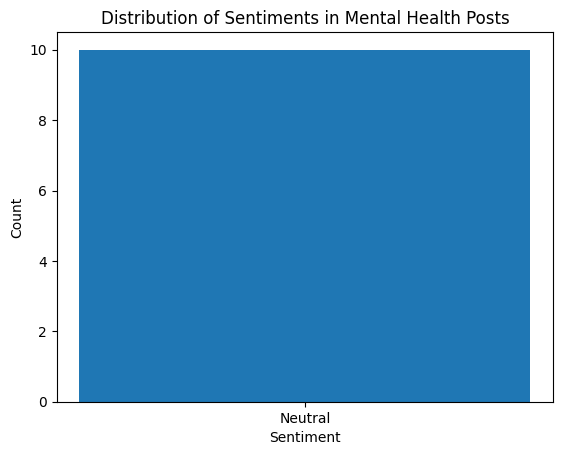

In [16]:
sentiments = []
for out in df_results["output"]:
    if "Positive" in out:
        sentiments.append("Positive")
    elif "Negative" in out:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

df_results["sentiment"] = sentiments
count = df_results["sentiment"].value_counts()

plt.bar(count.index, count.values)
plt.title("Distribution of Sentiments in Mental Health Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [17]:
df_results.to_csv("mental_health_analysis_results.csv", index=False)
print("✅ File saved as mental_health_analysis_results.csv")


✅ File saved as mental_health_analysis_results.csv


In [18]:
print("📊 Summary Insight:")
print("Most posts express negative or anxious emotions, indicating burnout and loneliness among students and workers.")
print("✅ Recommendation: Encourage mental health awareness programs, provide flexible workloads, and peer support groups.")


📊 Summary Insight:
Most posts express negative or anxious emotions, indicating burnout and loneliness among students and workers.
✅ Recommendation: Encourage mental health awareness programs, provide flexible workloads, and peer support groups.
